In [18]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import DateFormatter
 

#print(check_output(["ls", "./"]).decode("utf8"))

database = pd.read_csv('weather-history-2020-08-30.csv', sep=';')
database['datetime'] = pd.to_datetime(database['datetime'], errors='coerce')
database['datetime'] = database['datetime'].dt.floor('h')
database['day'] = database['datetime'].dt.floor('d')
database['precipitation'] = pd.to_numeric(database['precipitation'])

In [19]:
def select_by_period(startDate, endDate, database):
    return database[(database['datetime'] >= startDate) & (database['datetime'] < endDate)]

In [20]:
feb = select_by_period('2020-02-11 02:00:00.0', '2020-02-27 08:00:00.00', database)
#feb.tail()

In [21]:
aug = select_by_period ('2020-08-13 02:00:00.0', '2020-08-29 08:00:00.00' , database)
#aug.tail ()


In [22]:
def select_by_city(city , db):
    return db [ db ['city'] == city ]

In [23]:
feb_days = feb['day'].drop_duplicates()

In [24]:
aug_days = aug['day'].drop_duplicates()

In [25]:
def calculate_mean_among_3_cities( city1, city2, city3 , db_by_period , column_name):
    dbm = db_by_period[ (db_by_period['city'] == city1) | (db_by_period['city'] == city2)  | (db_by_period['city'] == city3)]
    return dbm[[column_name]].mean()


In [26]:
def compare_cities( city1, city2, city3 , database_by_period , column_name, grname, filename):
    mean_temperature_celsius = calculate_mean_among_3_cities(city1, city2, city3, database_by_period, column_name)
    
    db_city1 = select_by_city(city1,database_by_period)
    db_city2 = select_by_city(city2,database_by_period)
    db_city3 = select_by_city(city3,database_by_period)

    x1 = db_city1.datetime
    y1 = db_city1[column_name]
    
    x2 = db_city2.datetime
    y2 = db_city2[column_name]
    
    x3 = db_city3.datetime
    y3 = db_city3[column_name]
    
    
    plt.plot(x1, y1, label = city1.title(), color = "#76C256")
    plt.plot(x2, y2, label = city2.title(), color = "#E48161")
    plt.plot(x3, y3, label = city3.title(), color = "#666BC0")
    
    plt.axhline(y=float(round(mean_temperature_celsius, 4)), color='r', linestyle='--')

    plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1)) 

    plt.title(grname)
    plt.ylim([0, 46])
    plt.xticks(rotation=90)
    plt.xlabel('Days')
    plt.ylabel('°C')
    plt.savefig(filename, dpi=300, bbox_inches = "tight")
    
  


    return plt.show() 

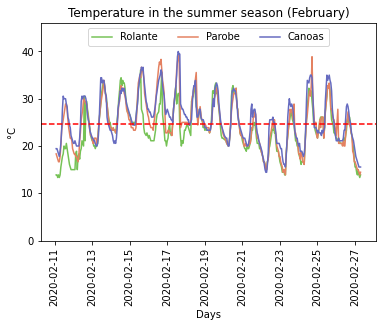

In [27]:
compare_cities('rolante', 'parobe', 'canoas', feb, 'temperature_celsius' , 'Temperature in the summer season (February)' , 'temperatura_fev.png')

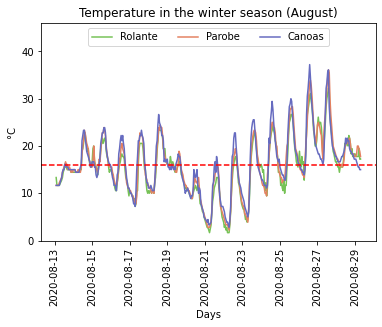

In [28]:
compare_cities('rolante', 'parobe', 'canoas', aug, 'temperature_celsius', 'Temperature in the winter season (August)', 'temperatura_ago.png')

In [29]:
def precipitation_by_city(city, db):
    day_city = select_by_city(city, db).groupby(['day']).sum()
    return day_city['precipitation']

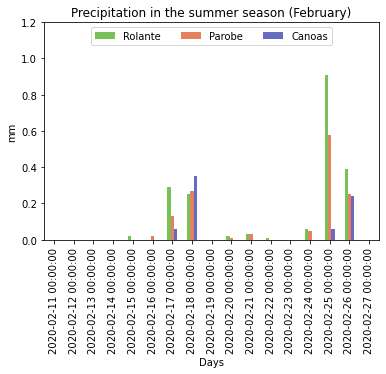

In [30]:
feb_days = feb['day'].drop_duplicates()

feb_rolante_by_day_prec = precipitation_by_city('rolante', feb)
feb_parobe_by_day_prec = precipitation_by_city('parobe', feb)
feb_canoas_by_day_prec = precipitation_by_city('canoas', feb)


df = pd.DataFrame({'Rolante' : feb_rolante_by_day_prec, 'Parobe': feb_parobe_by_day_prec, 'Canoas': feb_canoas_by_day_prec}, index=feb_days)


ax = df.plot.bar(rot=0, color=["#76C256", "#E48161", "#666BC0"])
plt.ylim([0, 1.2])
plt.xticks(rotation=90)
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1))
plt.title('Precipitation in the summer season (February)')
plt.xlabel('Days')
plt.ylabel('mm')
plt.savefig('precipitacao_fev.png', dpi=300, bbox_inches = "tight")

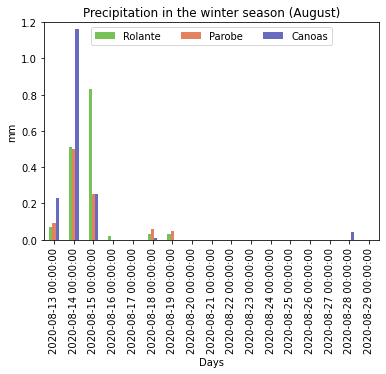

In [31]:
aug_days = aug['day'].drop_duplicates()


aug_rolante_by_day_prec = precipitation_by_city('rolante', aug)
aug_parobe_by_day_prec = precipitation_by_city('parobe', aug)
aug_canoas_by_day_prec = precipitation_by_city('canoas', aug)


df = pd.DataFrame({'Rolante' : aug_rolante_by_day_prec, 'Parobe': aug_parobe_by_day_prec, 'Canoas': aug_canoas_by_day_prec}, index=aug_days)

ax = df.plot.bar(rot=0, color=["#76C256", "#E48161", "#666BC0"])

plt.ylim([0, 1.2])
plt.xticks(rotation=90)
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1))
plt.title('Precipitation in the winter season (August)')
plt.xlabel('Days')
plt.ylabel('mm')
plt.savefig('precipitacao_ago.png', dpi=300, bbox_inches = "tight")
